In [1]:
from matchable_observable import simAlert, MOLIwhiteBox, forceEstimate
from requests import put, get
import json

windowAwake = [16, 15.5, 14.8, 17]
alertData = simAlert(4) #number_days
alertData.generate(windowAwake, 100000) #window_decision, resolution
samples = alertData.randSample(10, 5)

In [2]:
samples_data = {'time': json.dumps(samples['time']),
                'levAl': json.dumps(samples['levAl']),
                'windDecisions': json.dumps(samples['windDecisions']),
                'initial': json.dumps(samples['initial']),
                'final': json.dumps(samples['final'])}
samples['windDecisions']

[16, 15.5, 14.8, 17]

In [3]:
sampled = {'time': json.loads(samples_data['time']),
           'levAl': json.loads(samples_data['levAl']),
           'windDecisions': json.loads(samples_data['windDecisions']),
           'initial': json.loads(samples_data['initial']),
           'final': json.loads(samples_data['final'])}
sampled['initial']

[0.0, 24.0, 48.0, 72.0]

# Test the MOLI algorithm on Cloud

In [ ]:
put('http://lafetamarcelo.pythonanywhere.com/MOLI/al01', data=samples_data).json()

In [ ]:
windowSim = [16, 15.5, 16, 13, 16.1]
alertVal = simAlert(5) #number_days
alertVal.generate(windowSim, 100000) #window_decision, resolution

initial, final = [], []
for i in range(len(windowSim)):
    initial.append(24.0*i)
    final.append(24*i + windowSim[i])
__init = alertVal.levAl.loc[0,0]
simdata = {'init': json.dumps(initial), 
           'final': json.dumps(final),
           'lev': __init}
len(json.loads(simdata['final']))
#simdata

In [ ]:
data = get('http://lafetamarcelo.pythonanywhere.com/MOLI/al01', params=simdata).json()

In [ ]:
data['levAl'][2]

# Testing the local annealing algorithm

In [4]:
model = forceEstimate('Annealing') #'Annealing', 'None'

In [5]:
sampled['levAl']['0']
%matplotlib notebook

<IPython.core.display.Javascript object>


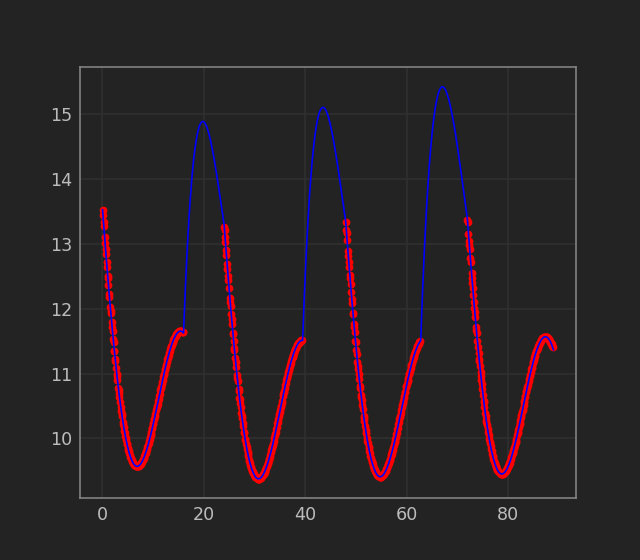

In [6]:
model.fit(sampled)

In [7]:
model.tau

28.328611898016998